K-means algorithm

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset, membership, centers = datasets.make_blobs(n_samples=500, n_features=2,
                                                   centers=3, return_centers=True,
                                                   cluster_std=1.0)

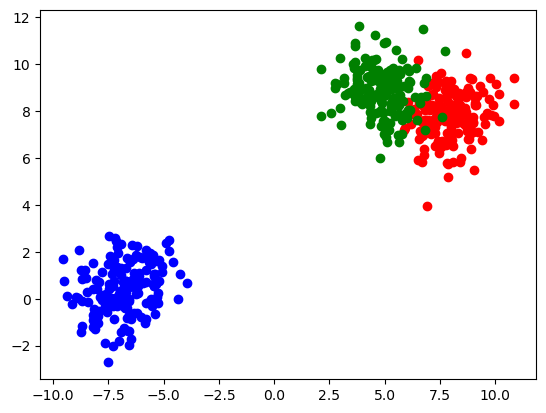

In [3]:
plt.scatter(dataset[(membership==0),0], dataset[(membership==0),1], color='r')
plt.scatter(dataset[(membership==1),0], dataset[(membership==1),1], color='g')
plt.scatter(dataset[(membership==2),0], dataset[(membership==2),1], color='b')
plt.show()

Why do I chosee to use a convex hull and a Voronoi tessellation?
It's because I found in the sklearn (k-mean section) documentation that it's useful to employ
a Voronoi tessellation method-like in order to get the centroids faster. 
So, I tried to do that, but I can't. I just start whit a random points, hopping that these very ones
would be the best ones to start.
I think the program could work as it is, but maybe it's something wrong or something cólud be change 
in order to make it work better.
I would appreciate any coments and corrections.

Postscript: I tried to run the program but the last cell haven't finished yet. I think that it's working because it haven't stop yet.

In [4]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
hull = ConvexHull(dataset)

simplex_hull=[]
for simplex in hull.simplices:
    simplex_hull.append(simplex)

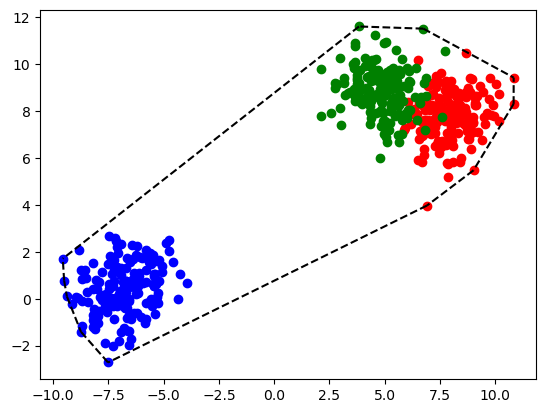

In [5]:
plt.scatter(dataset[(membership==0),0], dataset[(membership==0),1], color='r')
plt.scatter(dataset[(membership==1),0], dataset[(membership==1),1], color='g')
plt.scatter(dataset[(membership==2),0], dataset[(membership==2),1], color='b')

for simplex in hull.simplices:
    plt.plot(dataset[simplex, 0], dataset[simplex, 1], 'k',linestyle='--')

plt.show()

In [6]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(simplex_hull, incremental=False)
vertex_hull=vor.vertices # There is no need to create this variable... you can always call vor.vertices
index_vertex=[] # There is no need to create this list
for counter, vertex in enumerate(vertex_hull):
    index_vertex.append([counter,vertex])

In [12]:
k_centroids=3
n_points = len(dataset)
random_points = np.zeros(shape=(k_centroids,2),dtype=float)
for ii in range(0,k_centroids):
    random_index = np.random.randint(0,len(index_vertex))
    point_coordinates=vertex_hull[random_index]
    done=True        # this line
    if done is True: # and this line do nothing. Done is always True
        random_points[ii,:]=point_coordinates # This line is always executed... the "if" is doing nothing
print(random_points)   
print(random_points[0]) # The random centroids you took are voronoi vertices of the points defining the convex hull... I don't see why this is a good start.

[[220.93013228  82.58225699]
 [513.34177417 214.28794394]
 [491.5        372.        ]]
[220.93013228  82.58225699]


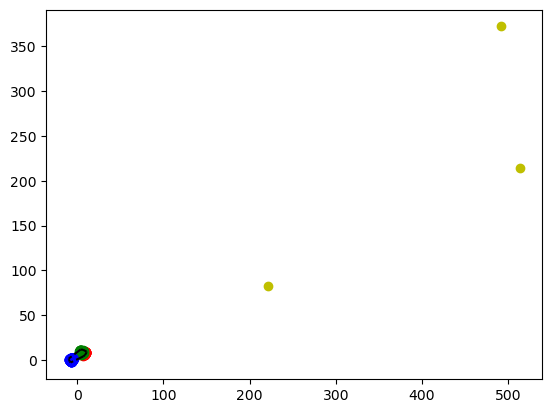

In [16]:
plt.scatter(dataset[(membership==0),0], dataset[(membership==0),1], color='r')
plt.scatter(dataset[(membership==1),0], dataset[(membership==1),1], color='g')
plt.scatter(dataset[(membership==2),0], dataset[(membership==2),1], color='b')

for simplex in hull.simplices:
    plt.plot(dataset[simplex, 0], dataset[simplex, 1], 'k',linestyle='--')

plt.scatter(random_points[:,0], random_points[:,1], color='y')
    
plt.show()

I don't see why this initial centroids are a good choice? Where did you find this approach? I don't find it.

In [24]:
from scipy.spatial.distance import euclidean as distance
n_points = len(dataset)
clustered = [[] for ii in range(k_centroids)]
cluster_index=[]
distances_to_centroid=[]
cluster_point = np.zeros(shape=(n_points,k_centroids),dtype=float)
improved_centroid=[[] for ii in range(k_centroids)]

for ll in range(n_points):
    done = False
    while done is False:
        distance_to_centroid = [distance(dataset[ll], random_points[yy]) for yy in range(k_centroids)]
        distances_to_centroid.append(distance_to_centroid)
        for yy in range(k_centroids):
            if min(distances_to_centroid[ll]) == distances_to_centroid[ll][yy]:
                cluster_point[ll][yy]=min(distances_to_centroid[ll])
            if cluster_point[ll][yy] !=0:
                clustered[yy].append(cluster_point[ll][yy])
            if len(clustered[yy])>0:
                improved_centroid[yy]=np.mean(clustered[yy])
            elif len(clustered[yy])==0:
                improved_centroid[yy]= random_points[yy]
        done = True
        distance_between_centroids = [distance(improved_centroid[yy], random_points[yy]) for yy in range(k_centroids)]
        for dd in distance_between_centroids:
            if dd > 200.0:
                done = False
                break
        if done is True:
            random_points[yy]=improved_centroid[yy]
print(random_points)

ValueError: Input vector should be 1-D.